In [ ]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 --version

In [1]:
import numpy as np
import os

# Animation tools
from IPython.display import HTML
from matplotlib.animation import PillowWriter

# Import the Swarm Systems Lab Simulator
from ssl_simulator import SimulationEngine, create_dir, load_sim, add_src_to_path
from ssl_simulator.robot_models import SingleIntegrator, Unicycle2D
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

from ssl_simulator.components.gvf import GvfLineAB

# -------------------------------------------------------------------------------------
# Import custom functions and classes (src in path is requiered)
add_src_to_path("", deep=1)

from sim_core.visualization import AnimationOscInst, AnimationOscAvg
from sim_core.visualization import AnimationGvfIkConsInterp, AnimationGvfIkConsInterp2
from sim_core.visualization import AnimationGvfIkConsInterpSim
from sim_core.controllers import Oscillator, GvfIKCons

# -------------------------------------------------------------------------------------
# Data and output directories
OUTPUT_DIR = os.path.join("..", "..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

create_dir(OUTPUT_DIR)

The directory '..\..\output' already exists!


## Animation: instant velocity VS average velocity

In [5]:
# Define the initial state
N = 1

p = np.ones((N,2)) * np.array([[0,0]])
x0 = [p]

# Controller settings
speed = np.ones((N)) * np.array([16])
omega = np.ones((N)) * 0.6
A = np.array([speed[0]/omega[0]*0.999])

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.05
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE)

# --------------------------------
# Run the simulation and save data
tf = 2*np.pi / np.min(omega) * 4

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 837/837 [00:00<00:00, 5331.22it/s]


[-0.60562536]


100%|██████████| 83/83 [01:42<00:00,  1.25s/it]


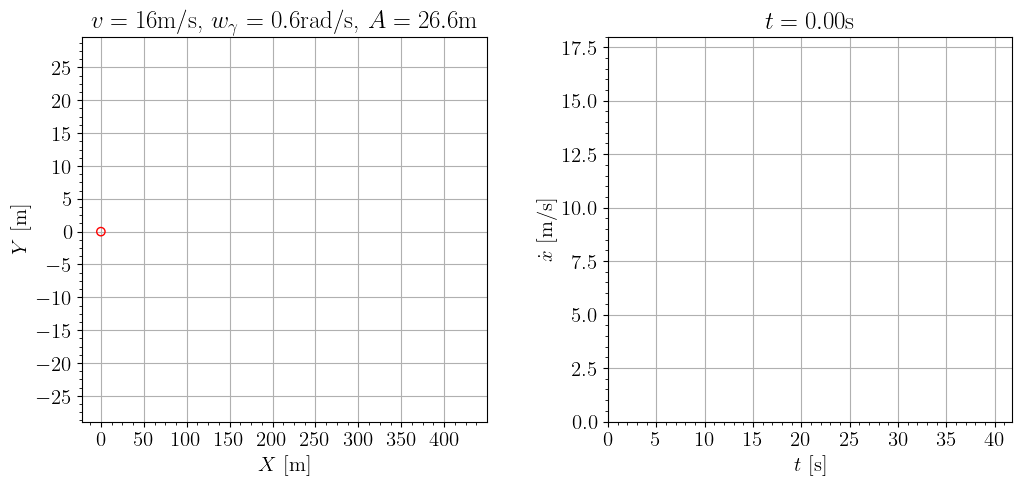

Simulating 167 (167) frames... 
Progress:


100%|██████████| 167/167 [01:52<00:00,  1.10it/s]

In [7]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=False)

# Initialize the animator with the loaded simulation data
animator = AnimationOscInst(simulation_data, 
    dpi=100, figsize=(12,5), debug=True)

anim = animator.gen_animation(fps=20, factor=5, wait_period=0)
HTML(anim.to_html5_video()) # It takes a loooot of time...

## Animation: fitting $A_i(t)$

### Launch 3

In [8]:
# Define the initial state
N = 3

p = np.ones((N,2)) * np.array([[0,0]])
x0 = [p]

# Controller settings
speed = np.ones((N)) * np.array([16])
omega = np.ones((N)) * 0.6
A = np.linspace(0, speed[0]/omega[0]*0.999, N)

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.1
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE)

# --------------------------------
# Run the simulation and save data
tf = 2*np.pi / np.min(omega) * 1.01

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 105/105 [00:00<00:00, 5675.58it/s]


In [9]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=False)

# Initialize the animator with the loaded simulation data
animator = AnimationGvfIkConsInterp(simulation_data, 
    dpi=200, figsize=(10,5), debug=False, colors=["red", "green", "royalblue"])

anim = animator.gen_animation(launch=True, fps=40)
HTML(anim.to_html5_video()) # It takes a loooot of time...

Simulating 438 (106) frames... 
Progress:


100%|██████████| 438/438 [02:37<00:00,  2.84it/s]

### Launch 20 at the same time

In [10]:
# Define the initial state
N = 20

p = np.ones((N,2)) * np.array([[0,0]])
x0 = [p]

# Controller settings
speed = np.ones((N)) * np.array([16])
omega = np.ones((N)) * 0.6
A = np.linspace(0, speed[0]/omega[0]*0.999, N)

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.1
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE)

# --------------------------------
# Run the simulation and save data
tf = 2*np.pi / np.min(omega) * 1 + dt

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 105/105 [00:00<00:00, 2957.76it/s]


In [11]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=False)

# Initialize the animator with the loaded simulation data
animator = AnimationGvfIkConsInterp2(simulation_data, 
    dpi=200, figsize=(10,5), debug=False)

anim = animator.gen_animation(fps=20, factor=1, wait_period=1)
HTML(anim.to_html5_video()) # It takes a loooot of time...

Simulating 126 (106) frames... 
Progress:


100%|██████████| 126/126 [01:09<00:00,  1.76it/s]

## Animation: simulation with multiple fixed-wing drones

In [12]:
# --------------------------------
# Define the initial state

# Number of agents
N = 8

# Initial position of the lines
line_x0 = np.zeros(N)
line_y0 = np.linspace(0,160,N)

# Initial stata of the robots
p = np.array([line_x0 + np.random.random(N)*100, line_y0 + np.random.random(N)*20]).T
p[0,1] = p[0,1] - 20 
p[-1,1] = p[-1,1] + 30 

np.random.seed(1236)
np.random.shuffle(p[:,1])

speed = np.ones((N)) * np.array([8])
theta = np.zeros((N)) + 2 * (np.random.random(N) - 0.5) * np.pi/2

# p = regpoly_formation(N,50)
# p[:,0] = p[:,0] + 35
# p[:,1] = p[:,1] + 80
# speed = np.ones((N)) * np.array([8])
# theta = np.ones((N)) * np.array([0])

x0 = [p, speed, theta]

# Conectivity graph
Z = [[0,1],[1,2],[2,3],[2,4],[3,5],[4,6],[5,7]]
# Z = [(i,i+1) for i in range(N-1)]
# Z.append([7,0])

# --------------------------------
# Controller settings
A = np.array([0,8,16])
omega = np.ones((N)) * 0.6
ka = 0.14

# --------------------------------
# Generate the trajectory to be followed
l = 2000
heading = 0

points_A = np.array([line_x0, line_y0]).T
points_B = np.array([line_x0 + l*np.cos(heading), line_y0 + l*np.sin(heading)]).T

gvf_traj = []
for i in range(N):
    gvf_traj.append(GvfLineAB(points_A[i], points_B[i]))

# Select the robot model
robot_model = Unicycle2D(x0, omega_lims=[-np.pi/4, np.pi/4])

# Initialize the controller
s, ke, kn = 1, 0.18, 1
controller = GvfIKCons(gvf_traj, Z, s, ke, kn, omega, ka)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, 
                             log_filename=SIMDATA_FILE, log_time_step=0.5)

In [13]:
# --------------------------------
# Run the simulation and save data
tf = 160

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 16000/16000 [00:06<00:00, 2528.89it/s]


In [14]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=False)

# Initialize the animator with the loaded simulation data
animator = AnimationGvfIkConsInterpSim(simulation_data, gvf_traj,
    dpi=200, figsize=(12,3), debug=False)

anim = animator.gen_animation(fps=20, factor=1, wait_period=0)
HTML(anim.to_html5_video()) # It takes a loooot of time...

Simulating 321 (321) frames... 
Progress:


100%|██████████| 321/321 [00:39<00:00,  8.36it/s]